# Multivariate analysis in Python

Main source: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

## Importing packages

In [177]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 60  # number of max rows to print for a DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [108]:
# A useful tool to have aside a notebook for quick experimentation and data visualization is a python console attached. 
# Uncomment the following line if you wish to have one.

# %qtconsole

## Importing data

In [109]:
# data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
# data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
# data.V1 = data.V1.astype(str)

# X = data.loc[:, "V2":]  # independent variables data
# y = data.V1  # dependent variable data
# data

data = pd.read_csv("input_ratios_cleaned.csv", encoding = "ISO-8859-1")
data.bankruptcy = data.bankruptcy.astype(str)

X = data.loc[:, "EBITTA":]  # independent variables data
y = data.bankruptcy  # dependent variable data
data

,Index,Year,Tickers,Year of bankruptcy,Year of last full year,bankruptcy,IS_OPER_INC,BS_TOT_ASSET,NET_INCOME,FUNDS_FROM_OPERATIONS_INDUS,BS_TOT_LIAB2,HISTORICAL_MARKET_CAP,SALES_REV_TURN,BS_LT_BORROW,BS_NET_FIX_ASSET,SHORT_AND_LONG_TERM_DEBT,WORKING_CAPITAL,BS_INVENTORIES,BS_CUR_ASSET_REPORT,Unnamed: 19,BS_CUR_LIAB,IS_INT_EXPENSE,BS_CASH_NEAR_CASH_ITEM,CF_CAP_EXPEND_PRPTY_ADD,BS_ACCT_NOTE_RCV,CASH_AND_MARKETABLE_SECURITIES,CASH_&_ST_INVESTMENTS,CF_CASH_FROM_OPER,EBITTA,NITA,FFOTA,NITL,FFOTL,EBITSALES,TLTA,TLWC,FFOWC,NIWC,CATA,FFOSALES,NISALES,CLPPE,QATA,SALESTA,SALESPPE,WCTA,CASALES,SALESWC,CACL,QACL,CASHTA,CASHTL,QAFEO,CASHFEO,RECSALES,QASALES,QACFO,CACFO
0,1,"Worldcom, Inc.",WCOEQ US EQUITY,2002.0,FY2001,1,"3,407","103,225","1,703","7,653","38,403","46,930","23,856","27,556","41,325","27,749","2,543",-,"9,187","5,777","6,644","1,150","1,583","-8,514","4,194","1,583","1,583","7,381",0.0330,0.0165,0.0741,0.0443,0.1993,0.1428,0.3720,15.1016,3.0093,0.6697,0.0890,0.3208,0.0714,0.1608,0.0560,0.2311,0.5773,0.0246,0.3851,9.3812,1.3828,0.8695,0.0153,0.0412,-0.6785,-0.1859,0.1758,0.2421,0.7826,1.2447
1,2,Verizon Communication,VZ US EQUITY,NaN,FY2001,0,"13,278","191,840",435,"24,338","130,413","144,848","75,084","51,283","83,589","72,252","-16,661","2,210","26,044","19,346","42,705","3,765","1,100","-19,412","16,010","3,336","3,336","22,096",0.0692,0.0023,0.1269,0.0033,0.1866,0.1768,0.6798,-7.8276,-1.4608,-0.0261,0.1358,0.3241,0.0058,0.5109,0.1008,0.3914,0.8983,-0.0868,0.3469,-4.5066,0.6099,0.4530,0.0057,0.0084,-0.9966,-0.0566,0.2132,0.2577,0.8756,1.1787
2,3,General Motors,GMGMQ US EQUITY,2008.0,FY2007,1,"-3,148","102,094","-28,297","7,656","126,423",,"131,492","26,258","29,498","30,405","-6,665","10,244","41,568","25,255","48,233","2,179","17,018","-5,510","6,623","18,632","18,632","5,648",-0.0308,-0.2772,0.0750,-0.2238,0.0606,-0.0239,1.2383,-18.9674,-1.1487,4.2454,0.4072,0.0582,-0.2152,1.6351,0.2474,1.2880,4.4577,-0.0653,0.3161,-19.7279,0.8618,0.5236,0.1667,0.1346,-4.5836,-3.0885,0.0504,0.1921,4.4715,7.3596
3,4,Ford Motors,F US EQUITY,NaN,FY2007,0,-470,"195,932","-1,989","6,466","192,485","10,130","125,992","73,918","24,672","115,566","-27,365","6,940","49,375","37,940","76,740","1,645","24,195","-4,400","3,106","34,834","34,834","11,070",-0.0024,-0.0102,0.0330,-0.0103,0.0336,-0.0037,0.9824,-7.0341,-0.2363,0.0727,0.2520,0.0513,-0.0158,3.1104,0.1936,0.6430,5.1067,-0.1397,0.3919,-4.6042,0.6434,0.4944,0.1235,0.1257,-8.6237,-5.4994,0.0247,0.3011,3.4272,4.4601
4,5,Enron Corp.,ENE US EQUITY,2001.0,FY2000,1,"2,121","69,721","1,063","3,291","53,981",,"109,463","9,101","12,499","10,888","2,102","1,014","32,337","12,528","30,235",910,"1,462","-2,586","11,065","1,462","1,462","5,190",0.0304,0.0153,0.0472,0.0197,0.0610,0.0194,0.7742,25.6785,1.5654,0.5058,0.4638,0.0301,0.0097,2.4190,0.1797,1.5700,8.7576,0.0302,0.2954,52.0711,1.0695,0.4143,0.0210,0.0271,-4.8447,-0.5656,0.1011,0.1144,2.4137,6.2304
5,6,Exxon Mobil Corp.,XOM US EQUITY,NaN,FY2000,0,"27,346","158,595","19,245","25,180","79,844","320,637","223,819","7,749","95,614","14,307","2,350","8,839","43,001","32,014","40,650",640,"7,536","-9,173","24,477","7,537","7,537","24,911",0.1724,0.1213,0.1588,0.2410,0.3154,0.1222,0.5034,33.9733,10.7142,8.1887,0.2711,0.1125,0.0860,0.4252,0.2019,1.4113,2.3409,0.0148,0.1921,95.2344,1.0578,0.7875,0.0475,0.0944,-3.4901,-0.8215,0.1094,0.1430,1.2851,1.7262
6,7,Pacific Gas and Electric Co.,PCG US EQUITY,2001.0,FY2000,1,"-5,221","38,480","-3,654",-76,"34,593","8,243","28,476","8,079","18,410","15,754","-6,527",417,"11,920","7,442","18,447",856,"2,586","-2,548","4,856","2,586","2,586",766,-0.1357,-0.0949,-0.0020,-0.1056,-0.0022,-0.1833,0.8990,-5.3001,0.0116,0.5598,0.3098,-0.0027,-0.1283,1.0020,0.1934,0.7400,1.5468,-0.1696,0.4186,-4.3630,0.6462,0.4034,0.0672,0.0748,-2.9209,-1.0151,0.1705,0.2613,9.7199,15.5682
7,8,Edison International,EIX US EQUITY,NaN,FY2000,0,"-1,991","37,360","-1,978",373,"33,157","5,419","11,611","12,932","19,056","18,063","-3,743",458,"6,031",

In [110]:
data.loc[:, "EBITTA":"FFOTL"]

,EBITTA,NITA,FFOTA,NITL,FFOTL
0,0.0330,0.0165,0.0741,0.0443,0.1993
1,0.0692,0.0023,0.1269,0.0033,0.1866
2,-0.0308,-0.2772,0.0750,-0.2238,0.0606
3,-0.0024,-0.0102,0.0330,-0.0103,0.0336
4,0.0304,0.0153,0.0472,0.0197,0.0610
5,0.1724,0.1213,0.1588,0.2410,0.3154
6,-0.1357,-0.0949,-0.0020,-0.1056,-0.0022
7,-0.0533,-0.0529,0.0100,-0.0596,0.0112
8,0.0476,-0.0057,0.0251,-0.0058,0.0256
9,0.0845,0.0630,0.1179,0.1099,0.2054


To make a matrix scatterplot of just these 5 variables using the scatter_matrix() function we type:

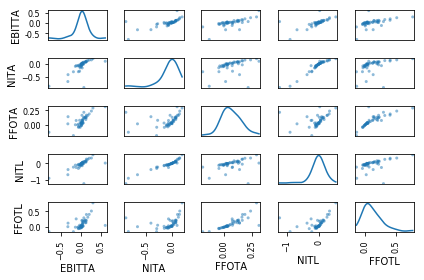

In [111]:
pd.tools.plotting.scatter_matrix(data.loc[:, "EBITTA":"FFOTL"], diagonal="kde")
plt.tight_layout()
plt.show()

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

For example, in the matrix scatterplot above, the cell in the third column of the fourth row down is a scatterplot of V5 (x-axis) against V4 (y-axis). If you look at this scatterplot, it appears that there may be a positive relationship between V5 and V4.

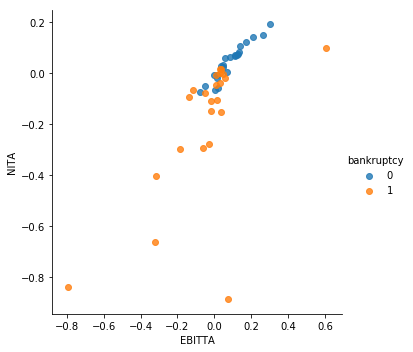

In [112]:
sns.lmplot("EBITTA", "NITA", data, hue="bankruptcy", fit_reg=False);

Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

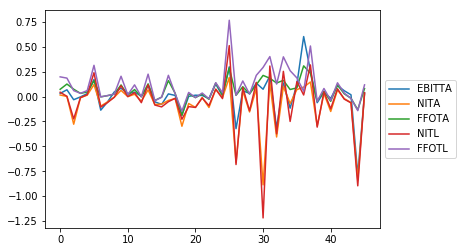

In [113]:
ax = data[["EBITTA","NITA","FFOTA","NITL","FFOTL"]].plot()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Calculating Summary Statistics for Multivariate Data

Another thing that you are likely to want to do is to calculate summary statistics such as the mean and standard deviation for each of the variables in your multivariate data set.

This is easy to do, using the mean() and std() functions in numpy and applying them to the dataframe using its member function apply.

In [114]:
X.apply(np.mean)

EBITTA        0.018757
NITA         -0.074772
FFOTA         0.065620
NITL         -0.059517
FFOTL         0.115033
EBITSALES    -0.028111
TLTA          0.887939
TLWC          2.418261
FFOWC         0.523017
NIWC          0.621633
               ...    
CACL          1.259565
QACL          0.772678
CASHTA        0.065315
CASHTL        0.085507
QAFEO        -7.745317
CASHFEO      -2.065074
RECSALES      0.114604
QASALES       0.249889
QACFO        14.452124
CACFO        22.163078
Length: 30, dtype: float64

In [115]:
X.apply(np.mean)

EBITTA        0.018757
NITA         -0.074772
FFOTA         0.065620
NITL         -0.059517
FFOTL         0.115033
EBITSALES    -0.028111
TLTA          0.887939
TLWC          2.418261
FFOWC         0.523017
NIWC          0.621633
               ...    
CACL          1.259565
QACL          0.772678
CASHTA        0.065315
CASHTL        0.085507
QAFEO        -7.745317
CASHFEO      -2.065074
RECSALES      0.114604
QASALES       0.249889
QACFO        14.452124
CACFO        22.163078
Length: 30, dtype: float64

In [116]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [117]:
printMeanAndSdByGroup(X, y)

## Means:


,EBITTA,NITA,FFOTA,NITL,FFOTL,EBITSALES,TLTA,TLWC,FFOWC,NIWC,CATA,FFOSALES,NISALES,CLPPE,QATA,SALESTA,SALESPPE,WCTA,CASALES,SALESWC,CACL,QACL,CASHTA,CASHTL,QAFEO,CASHFEO,RECSALES,QASALES,QACFO,CACFO
bankruptcy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.084222,0.042678,0.099504,0.094635,0.187265,0.084170,0.676961,2.722939,0.793409,0.431830,0.315335,0.128030,0.028783,1.746170,0.213039,0.886391,6.527709,0.064317,0.401613,6.652935,1.419143,0.982026,0.064865,0.098135,-7.555522,-1.605565,0.128087,0.279765,2.054352,2.372835
1,-0.046709,-0.192222,0.031735,-0.213670,0.042800,-0.140391,1.098917,2.113583,0.252626,0.811435,0.328322,-0.012109,-0.380530,6.102778,0.180543,0.947904,6.195452,-0.375770,0.400583,2.942122,1.099987,0.563330,0.065765,0.072878,-7.935113,-2.524583,0.101122,0.220013,26.849896,41.953322



## Standard deviations:


,EBITTA,NITA,FFOTA,NITL,FFOTL,EBITSALES,TLTA,TLWC,FFOWC,NIWC,CATA,FFOSALES,NISALES,CLPPE,QATA,SALESTA,SALESPPE,WCTA,CASALES,SALESWC,CACL,QACL,CASHTA,CASHTL,QAFEO,CASHFEO,RECSALES,QASALES,QACFO,CACFO
bankruptcy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.091291,0.070914,0.074551,0.147767,0.184379,0.111451,0.201919,16.082027,3.024336,2.252599,0.167752,0.092681,0.101860,4.514736,0.126653,0.534031,19.231943,0.142018,0.169785,25.560582,0.698523,0.570559,0.055814,0.072655,19.241711,2.072869,0.073999,0.154479,6.808196,8.405147
1,0.231700,0.264106,0.103271,0.308705,0.109632,0.395622,1.009276,11.946412,0.822115,2.499411,0.220810,0.327131,0.624147,19.700736,0.149863,0.597378,9.819994,1.036375,0.225604,17.017997,0.963919,0.538125,0.062769,0.089786,15.520742,3.274720,0.053713,0.145161,91.760051,129.970687



## Sample sizes:


,0
bankruptcy,
0,23
1,23


In [118]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [120]:
calcWithinGroupsVariance(X.EBITTA, y)

0.032419125849802374

In [22]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

In [121]:
calcBetweenGroupsVariance(X.EBITTA, y)

0.1971419556521739

In [122]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [123]:
calcSeparations(X, y)

variable EBITTA Vw= 0.032419125849802374 Vb= 0.1971419556521739 separation= 6.081038599422189
variable NITA Vw= 0.039089816778656125 Vb= 0.6345471149999999 separation= 16.233054214428456
variable FFOTA Vw= 0.008480034584980237 Vb= 0.052816210652173935 separation= 6.228301326237696
variable NITL Vw= 0.061228901837944674 Vb= 1.0930930652173916 separation= 17.852566882719785
variable FFOTL Vw= 0.024053316185770748 Vb= 0.24000728891304357 separation= 9.978137195694663
variable EBITSALES Vw= 0.08830843061264824 Vb= 0.5799172176086955 separation= 6.566951915977489
variable TLTA Vw= 0.5537821188142293 Vb= 2.0475440217391316 separation= 3.697381970590489
variable TLWC Vw= 209.79572337472334 Vb= 4.270126761739126 separation= 0.020353735972549386
variable FFOWC Vw= 5.134477800059288 Vb= 3.3631270434782605 separation= 0.6550085859635865
variable NIWC Vw= 5.917928630019764 Vb= 1.6571438002173937 separation= 0.2800209167463142
variable CATA Vw= 0.040196505256917 Vb= 0.0019396019565217273 separation

In [124]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [126]:
calcWithinGroupsCovariance(X.EBITTA, X.NITA, y)

0.02352906992094862

In [127]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [128]:
calcBetweenGroupsCovariance(X.EBITTA, X.NITA, y)

0.35368892999999996

In [130]:
corr = stats.pearsonr(X.EBITTA, X.NITA)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 3.198893132575094e-08
cor:		 0.7104044425182487


In [131]:
corrmat = X.corr()
corrmat

,EBITTA,NITA,FFOTA,NITL,FFOTL,EBITSALES,TLTA,TLWC,FFOWC,NIWC,CATA,FFOSALES,NISALES,CLPPE,QATA,SALESTA,SALESPPE,WCTA,CASALES,SALESWC,CACL,QACL,CASHTA,CASHTL,QAFEO,CASHFEO,RECSALES,QASALES,QACFO,CACFO
EBITTA,1.000000,0.710404,0.707338,0.647864,0.526062,0.815148,0.307618,0.106736,0.175044,-0.022393,0.099787,0.374575,0.520317,0.436528,0.078658,0.282216,0.124817,-0.354133,-0.339689,0.172754,-0.156135,-0.155619,0.226878,0.032986,-0.015753,-0.135941,-0.010313,-0.263739,0.006072,0.006981
NITA,0.710404,1.000000,0.372454,0.966345,0.387588,0.605311,-0.041991,0.207658,0.214725,-0.216634,0.043006,0.184794,0.825660,0.093706,0.018675,0.179259,0.064432,0.036805,-0.171506,0.249239,0.092564,0.068562,0.076923,0.152883,0.014259,-0.040295,0.039039,-0.105834,0.002016,0.007061
FFOTA,0.707338,0.372454,1.000000,0.363505,0.823555,0.685603,0.167365,0.028905,0.196041,0.124356,0.146860,0.689142,0.373598,0.337704,0.141352,0.261726,0.033135,-0.216609,-0.294731,0.169578,-0.018795,-0.001981,0.220976,0.156251,0.110099,0.055135,0.082025,-0.158415,-0.132370,-0.139999
NITL,0.647864,0.966345,0.363505,1.000000,0.457906,0.517130,-0.100852,0.188322,0.259173,-0.118362,0.070810,0.110155,0.788446,0.025130,0.051195,0.212823,0.041915,0.095367,-0.172569,0.262472,0.135047,0.113529,0.020726,0.106864,0.026915,0.028173,0.054769,-0.111305,-0.011133,-0.008921
FFOTL,0.526062,0.387588,0.823555,0.457906,1.000000,0.490618,-0.286871,0.102899,0.319510,0.158084,0.057176,0.504682,0.298942,-0.088122,0.050236,0.184771,-0.079649,0.178134,-0.233603,0.249498,0.174342,0.172288,-0.066147,0.263785,0.155423,0.261752,0.084186,-0.149466,-0.133901,-0.142696
EBITSALES,0.815148,0.605311,0.685603,0.517130,0.490618,1.000000,0.042026,0.103675,0.125941,0.004308,0.062727,0.771807,0.712562,0.189005,0.060873,0.252013,0.093087,-0.045114,-0.388708,0.107112,-0.071136,-0.068979,0.145223,0.064399,-0.043096,-0.090603,0.070580,-0.192648,0.048173,0.050949
TLTA,0.307618,-0.041991,0.167365,-0.100852,-0.286871,0.042026,1.000000,-0.137337,-0.157432,-0.037107,0.242998,-0.090109,-0.067290,0.915546,0.254704,0.121270,0.179071,-0.922725,0.046188,-0.140156,-0.323954,-0.288901,0.550252,-0.169320,-0.079174,-0.423432,-0.079946,0.046528,0.009312,0.004543
TLWC,0.106736,0.207658,0.028905,0.188322,0.102899,0.103675,-0.137337,1.000000,0.727779,0.050428,-0.118542,0.062372,0.125600,-0.073092,-0.178856,-0.033872,-0.065842,0.115641,-0.010706,0.832943,0.220938,0.146837,-0.075559,0.047326,0.082195,0.011782,-0.133484,-0.063222,-0.011318,0.001632
FFOWC,0.175044,0.214725,0.196041,0.259173,0.319510,0.125941,-0.157432,0.727779,1.000000,0.532116,-0.063284,0.085187,0.145166,-0.057432,-0.028809,0.150549,-0.035599,0.085358,-0.173583,0.856374,0.077282,0.093993,-0.044306,0.111221,0.036869,0.090497,-0.067475,-0.130959,-0.045967,-0.049058
NIWC,-0.022393,-0.216634,0.124356,-0.118362,0.158084,0.004308,-0.037107,0.050428,0.532116,1.000000,-0.042369,0.052484,-0.099058,-0.025905,0.047035,0.221551,0.019146,0.011960,-0.313712,0.313798,-0.185865,-0.111777,-0.004466,-0.017640,-0.056381,0.063805,-0.038638,-0.215711,-0.054115,-0.064177


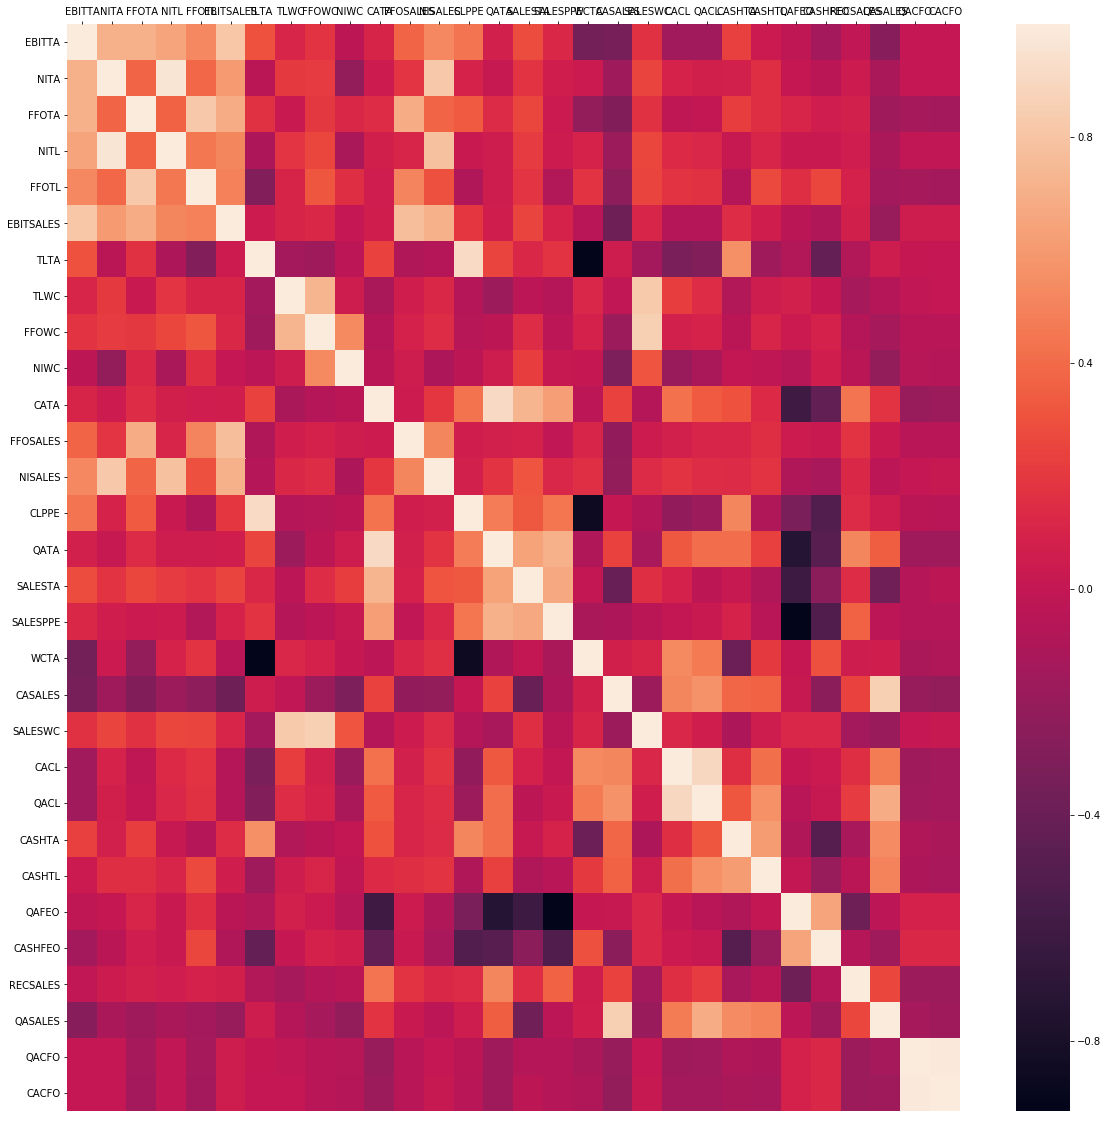

In [141]:
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

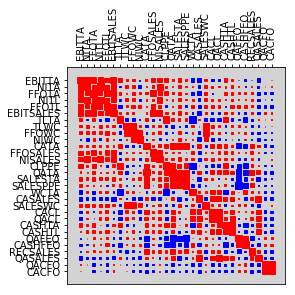

In [150]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

In [151]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [152]:
mosthighlycorrelated(X, 10)

,FirstVariable,SecondVariable,Correlation
0,QACFO,CACFO,0.985761
1,NITA,NITL,0.966345
2,SALESPPE,QAFEO,-0.923959
3,TLTA,WCTA,-0.922725
4,TLTA,CLPPE,0.915546
5,CATA,QATA,0.903532
6,CACL,QACL,0.900469
7,CLPPE,WCTA,-0.860663
8,FFOWC,SALESWC,0.856374
9,CASALES,QASALES,0.850432


## Standardising data

In [153]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [154]:
standardisedX.apply(np.mean)

EBITTA      -1.719639e-17
NITA         1.689470e-17
FFOTA       -3.258263e-17
NITL        -1.568793e-17
FFOTL        3.394024e-17
EBITSALES    9.050731e-18
TLTA         2.280784e-16
TLWC        -9.654113e-18
FFOWC       -9.654113e-18
NIWC        -3.620292e-18
                 ...     
CACL         1.206764e-17
QACL        -2.437664e-16
CASHTA       7.723291e-17
CASHTL      -5.430439e-18
QAFEO        3.861645e-17
CASHFEO     -6.033821e-17
RECSALES     1.930823e-17
QASALES      1.713605e-16
QACFO       -2.413528e-17
CACFO       -2.051499e-17
Length: 30, dtype: float64

In [155]:
standardisedX.apply(np.std)

EBITTA       1.0
NITA         1.0
FFOTA        1.0
NITL         1.0
FFOTL        1.0
EBITSALES    1.0
TLTA         1.0
TLWC         1.0
FFOWC        1.0
NIWC         1.0
            ... 
CACL         1.0
QACL         1.0
CASHTA       1.0
CASHTL       1.0
QAFEO        1.0
CASHFEO      1.0
RECSALES     1.0
QASALES      1.0
QACFO        1.0
CACFO        1.0
Length: 30, dtype: float64

## Principal component analysis 

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the wine data set, we have 13 chemical concentrations describing wine samples from three different cultivars. We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 13 chemical concentrations.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the scale() function (see above). This is necessary if the input variables have very different variances, which is true in this case as the concentrations of the 13 chemicals have very different variances (see above).

Once you have standardised your variables, you can carry out a principal component analysis using the PCA class from sklearn.decomposition package and its fit method, which fits the model with the data X. The default solver is Singular Value Decomposition (“svd”). For more information you can type help(PCA) in the python console.

For example, to standardise the concentrations of the 13 chemicals in the wine samples, and carry out a principal components analysis on the standardised concentrations

In [158]:
pca = PCA().fit(standardisedX)

You can get a summary of the principal component analysis results using the pca_summary() function below, which simulates the output of R’s summary function on a PCA model:

In [159]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

The parameters of the print_pca_summary function are:

* pca: A PCA object
* standardised_data: The standardised data
* out (True): Print to standard output

This gives us the standard deviation of each component, and the proportion of variance explained by each component.

In [160]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.437571,0.198058,0.198058
PC2,2.274411,0.172432,0.370490
PC3,2.085007,0.144909,0.515398
PC4,1.715463,0.098094,0.613492
PC5,1.560088,0.081129,0.694621
PC6,1.431606,0.068316,0.762938
PC7,1.274360,0.054133,0.817071
PC8,1.078593,0.038779,0.855850
PC9,1.024950,0.035017,0.890867


### Deciding how many principal components to retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot, which we can do using the screeplot() function below:

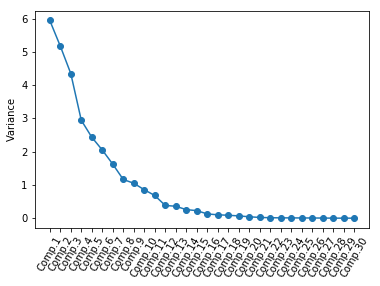

In [161]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

The most obvious change in slope in the scree plot occurs at component 4, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [162]:
summary.sdev**2

,Standard deviation
PC1,5.941752
PC2,5.172945
PC3,4.347256
PC4,2.942815
PC5,2.433875
PC6,2.049495
PC7,1.623993
PC8,1.163363
PC9,1.050522
PC10,0.855778


We see that the variance is above 1 for principal components 1, 2, and 3 (which have variances 4.71, 2.50, and 1.45, respectively). Therefore, using Kaiser’s criterion, we would retain the first three principal components.

A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance, we would retain the first five principal components, as we can see from cumulative proportions (summary.cumprop) that the first five principal components explain 80.2% of the variance (while the first four components explain just 73.6%, so are not sufficient).

### Loadings fro the principal components

The loadings for the principal components are stored in a named element components_ of the variable returned by PCA().fit(). This contains a matrix with the loadings of each principal component, where the first column in the matrix contains the loadings for the first principal component, the second column contains the loadings for the second principal component, and so on.

Therefore, to obtain the loadings for the first principal component in our analysis of the 13 chemical concentrations in wine samples, we type:

In [163]:
pca.components_[0]

array([ 0.30359883,  0.25520248,  0.27574466,  0.24194077,  0.19717468,
        0.28896039,  0.1171564 ,  0.04262953,  0.09255698,  0.01746636,
        0.24830195,  0.19794849,  0.27957   ,  0.22766639,  0.25763314,
        0.25954615,  0.21953052, -0.08183279, -0.06166457,  0.07460346,
        0.06348823,  0.0703806 ,  0.16446292,  0.09623345, -0.1862333 ,
       -0.16979047,  0.12022464, -0.0020531 , -0.06899535, -0.06699737])

This means that the first principal component is a linear combination of the variables:

-0.144*Z2 + 0.245*Z3 + 0.002*Z4 + 0.239*Z5 - 0.142*Z6 - 0.395*Z7 - 0.423*Z8 + 0.299*Z9 -0.313*Z10 + 0.089*Z11 - 0.297*Z12 - 0.376*Z13 - 0.287*Z14

To calculate the values of the first principal component, we can define our own function to calculate a principal component given the loadings and the input variables’ values:

In [164]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [165]:
calcpc(standardisedX, pca.components_[0])

# same as
# pca.transform(standardisedX)[:, 0]

array([-0.32262772, -0.30010068, -0.10234436, -0.12326226,  0.55682996,
        2.3309114 , -1.20444918, -1.64748131, -0.76339245,  0.71054586,
        0.19958247, -0.32436933, -0.97024699,  0.8256246 , -1.66416833,
       -1.35755513,  0.9784504 , -0.86545097, -6.97402031, -1.00566014,
       -2.67352279, -0.18044644, -1.45576303,  1.69101264,  0.40184864,
        3.24808869, -3.75423822, -0.47289717,  0.60119091,  0.94729808,
       -3.1033936 ,  2.15826608, -1.76941137,  2.03557829, -0.24496233,
        2.03039884,  7.71024143,  3.27866904,  3.00200947,  5.62343422,
       -1.80705638, -0.27289883, -0.82417066,  0.4366295 , -4.99629545,
        0.4135749 ])

The first principal component has highest (in absolute value) loadings for V8 (-0.423), V7 (-0.395), V13 (-0.376), V10 (-0.313), V12 (-0.297), V14 (-0.287), V9 (0.299), V3 (0.245), and V5 (0.239). The loadings for V8, V7, V13, V10, V12 and V14 are negative, while those for V9, V3, and V5 are positive. Therefore, an interpretation of the first principal component is that it represents a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5.

Similarly, we can obtain the loadings for the second principal component by typing:

In [166]:
pca.components_[1]

array([-0.18222111, -0.19840788, -0.16971152, -0.20158278, -0.22345105,
       -0.20834657,  0.16224243, -0.15702871, -0.18611431, -0.074913  ,
        0.25889353, -0.14216575, -0.14952879,  0.17095009,  0.29201168,
        0.05481535,  0.20779544, -0.08749711,  0.26984897, -0.20203292,
        0.09916887,  0.13368112,  0.19069466,  0.07339769, -0.23882044,
       -0.24148696,  0.14295951,  0.24735735, -0.08618787, -0.0894274 ])

## Linear discriminant analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the wine data set, we have 13 chemical concentrations describing wine samples from three cultivars. By carrying out a principal component analysis, we found that most of the variation in the chemical concentrations between the samples can be captured using the first two principal components, where each of the principal components is a particular linear combination of the 13 chemical concentrations.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. Linear discriminant analysis is also known as canonical discriminant analysis, or simply discriminant analysis.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups (G) is 3, and the number of variables is 13 (13 chemicals’ concentrations; p = 13). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of G-1 and p, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.

You can carry out a linear discriminant analysis by using the LinearDiscriminantAnalysis class model from the module sklearn.discriminant_analysis and using its method fit() to fit our X, y data.

For example, to carry out a linear discriminant analysis using the 13 chemical concentrations in the wine samples, we type:

In [167]:
lda = LinearDiscriminantAnalysis().fit(X, y)

## Loadings for the discriminant functions

The values of the loadings of the discriminant functions for the wine data are stored in the scalings_ member of the lda object model. For a pretty print we can type:

In [168]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1
EBITTA,-27.744228
NITA,5.907649
FFOTA,-27.700399
NITL,-5.195420
FFOTL,20.914048
EBITSALES,16.062511
TLTA,3.787488
TLWC,0.007960
FFOWC,0.066174
NIWC,0.027910


This means that the first discriminant function is a linear combination of the variables:

-0.403*V2 + 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14


where V2, V3, ..., V14 are the concentrations of the 14 chemicals found in the wine samples. For convenience, the value for each discriminant function (eg. the first discriminant function) are scaled so that their mean value is zero (see below).

Note that these loadings are calculated so that the within-group variance of each discriminant function for each group (cultivar) is equal to 1, as will be demonstrated below.

As mentioned above, these scalings are stored in the named member scalings_ of the object variable returned by LinearDiscriminantAnalysis().fit(X, y). This element contains a numpy array, in which the first column contains the loadings for the first discriminant function, the second column contains the loadings for the second discriminant function and so on. For example, to extract the loadings for the first discriminant function, we can type:

In [169]:
lda.scalings_[:, 0]

array([-27.74422768,   5.90764861, -27.70039909,  -5.19542003,
        20.91404762,  16.06251149,   3.78748807,   0.00795982,
         0.0661741 ,   0.02790995,  -1.0865174 ,  -6.63272614,
        -2.0023904 ,  -0.10051766, -22.80458388,   4.71083528,
         0.02158824,  -2.83170525,   4.43102455,  -0.01414103,
         2.18827901,  -2.20535353,  13.73985534,   5.98375121,
        -0.02548167,  -0.04688265,  15.65048094,  -1.79540212,
        -0.00375709,   0.0050119 ])

In [170]:
pretty_scalings_.LD1

EBITTA      -27.744228
NITA          5.907649
FFOTA       -27.700399
NITL         -5.195420
FFOTL        20.914048
EBITSALES    16.062511
TLTA          3.787488
TLWC          0.007960
FFOWC         0.066174
NIWC          0.027910
               ...    
CACL          2.188279
QACL         -2.205354
CASHTA       13.739855
CASHTL        5.983751
QAFEO        -0.025482
CASHFEO      -0.046883
RECSALES     15.650481
QASALES      -1.795402
QACFO        -0.003757
CACFO         0.005012
Name: LD1, Length: 30, dtype: float64

To calculate the values of the first discriminant function, we can define our own function calclda():

In [171]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

In [172]:
calclda(X, lda.scalings_[:, 0])

array([-0.4555935 , -2.28066591,  1.72498418, -1.85291586,  0.69398277,
       -2.7791754 ,  1.37927946, -1.33329849,  2.13603918, -0.49722431,
        2.46090189, -0.61152524,  2.94125316, -1.53538343,  1.22761314,
       -2.76897931,  2.79750245, -3.31101724,  2.40726663, -2.18248491,
        2.45662447, -1.45733981,  1.72220153, -3.58624043,  2.34727005,
       -2.3351419 ,  3.06728755, -2.91191469,  1.9389462 , -2.79063361,
        2.59530779, -1.67682237,  2.14427359, -2.47087382,  2.49484884,
       -3.58155291,  2.59067238, -3.25110388,  2.01025119, -2.20556527,
        4.02881407, -1.9423574 ,  0.79850721,  0.86377986,  2.88265198,
       -1.89244988])

In [173]:
# Try either, they produce the same result, use help() for more info
# lda.transform(X)[:, 0]
lda.fit_transform(X, y)[:, 0]

array([-0.4555935 , -2.28066591,  1.72498418, -1.85291586,  0.69398277,
       -2.7791754 ,  1.37927946, -1.33329849,  2.13603918, -0.49722431,
        2.46090189, -0.61152524,  2.94125316, -1.53538343,  1.22761314,
       -2.76897931,  2.79750245, -3.31101724,  2.40726663, -2.18248491,
        2.45662447, -1.45733981,  1.72220153, -3.58624043,  2.34727005,
       -2.3351419 ,  3.06728755, -2.91191469,  1.9389462 , -2.79063361,
        2.59530779, -1.67682237,  2.14427359, -2.47087382,  2.49484884,
       -3.58155291,  2.59067238, -3.25110388,  2.01025119, -2.20556527,
        4.02881407, -1.9423574 ,  0.79850721,  0.86377986,  2.88265198,
       -1.89244988])

In linear discriminant analysis, the standardised version of an input variable is defined so that it has mean zero and within-groups variance of 1. Thus, we can calculate the “group-standardised” variable by subtracting the mean from each value of the variable, and dividing by the within-groups standard deviation. To calculate the group-standardised version of a set of variables, we can use the function groupStandardise() below:

In [174]:
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

For example, we can use the groupStandardise() function to calculate the group-standardised versions of the chemical concentrations in wine samples:

In [175]:
groupstandardisedX = groupStandardise(X, y)

We can then use the LinearDiscriminantAnalysis().fit() method to perform linear disriminant analysis on the group-standardised variables:

In [178]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y)
pretty_scalings(lda2, groupstandardisedX)

,LD1
EBITTA,-4.995435
NITA,1.168010
FFOTA,-2.550850
NITL,-1.285579
FFOTL,3.243587
EBITSALES,4.773254
TLTA,2.818518
TLWC,0.115293
FFOWC,0.149946
NIWC,0.067896
